In [3]:
if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")
BiocManager::install("DESeq2")
install.packages("pheatmap")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.2 (2021-11-01)

Installing package(s) 'DESeq2'

also installing the dependency ‘geneplotter’


Old packages: 'backports', 'brio', 'cpp11', 'credentials', 'devtools',
  'digest', 'fs', 'glue', 'memoise', 'openssl', 'pkgbuild', 'pkgload', 'readr',
  'remotes', 'stringi', 'vroom', 'withr', 'xml2', 'nlme'

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
library("DESeq2")
library("pheatmap")

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb

Loading required package: SummarizedExperiment

Loading required package: MatrixGe

In [39]:
system("git clone https://github.com/mrGnost/hse21_hw3")
system("git pull")

In [43]:
info   <- read.table("hse21_hw3/counts/ALL.info", header=TRUE, row.names="sample")
df <- read.table("hse21_hw3/counts/ALL.counts", header=TRUE, row.names="geneID")
counts <- as.matrix(df)

dds <- DESeqDataSetFromMatrix(countData = counts, colData = info, design = ~ condition)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


In [44]:
head(info)

,id,condition
,<chr>,<chr>
SRR3414629,SRR3414629,reprogramming
SRR3414630,SRR3414630,reprogramming
SRR3414631,SRR3414631,reprogramming
SRR3414635,SRR3414635,control
SRR3414636,SRR3414636,control
SRR3414637,SRR3414637,control


In [45]:
head(counts)

,SRR3414629,SRR3414630,SRR3414631,SRR3414635,SRR3414636,SRR3414637
ENSMUSG00000000001.4,4489,2207,5700,3431,3504,4031
ENSMUSG00000000003.15,0,0,0,0,0,0
ENSMUSG00000000028.15,345,153,468,150,136,152
ENSMUSG00000000031.16,64504,18732,64992,55526,48225,56064
ENSMUSG00000000037.17,77,35,87,41,44,52
ENSMUSG00000000049.11,4,1,1,10,8,10


In [46]:
dds$condition <- relevel(dds$condition, ref="control")

dds <- DESeq(dds)
res <- results(dds, alpha=0.01) 

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



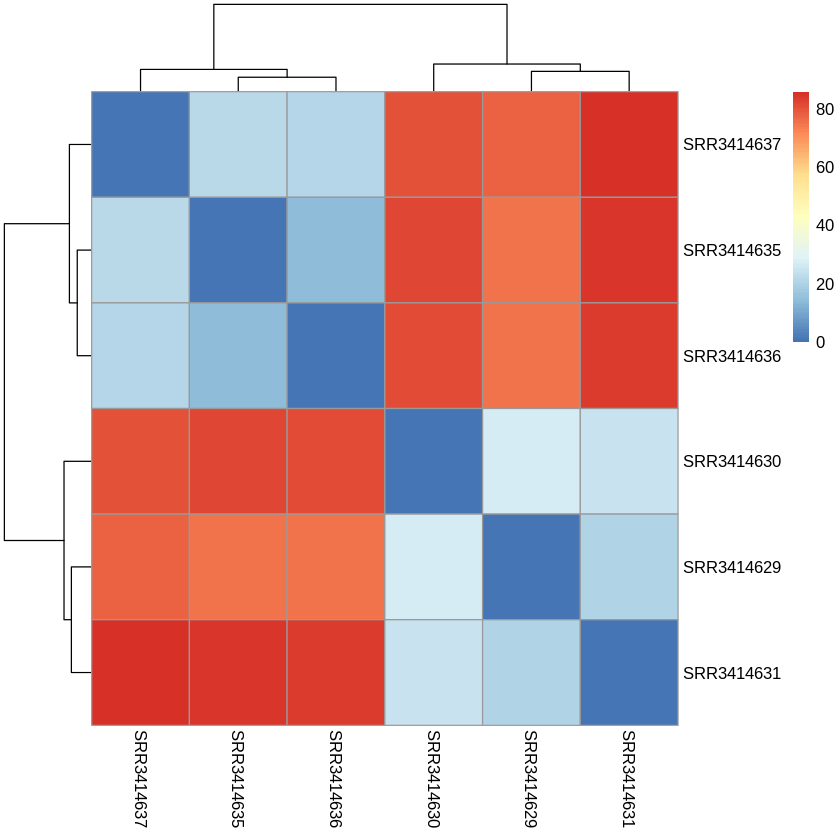

In [47]:
rld <- rlog(dds)
sampleDists <- dist(t(assay(rld)))
sampleDistMatrix <- as.matrix(sampleDists)
pheatmap(sampleDistMatrix, clustering_distance_rows=sampleDists, clustering_distance_cols=sampleDists)

In [48]:
resOrdered <- res[order(res$padj),]
resSignificant <- subset(resOrdered, padj < 0.01)
write.table(resSignificant, "differentially_expressed_genes.txt", sep="\t", row.names=TRUE, quote = FALSE)

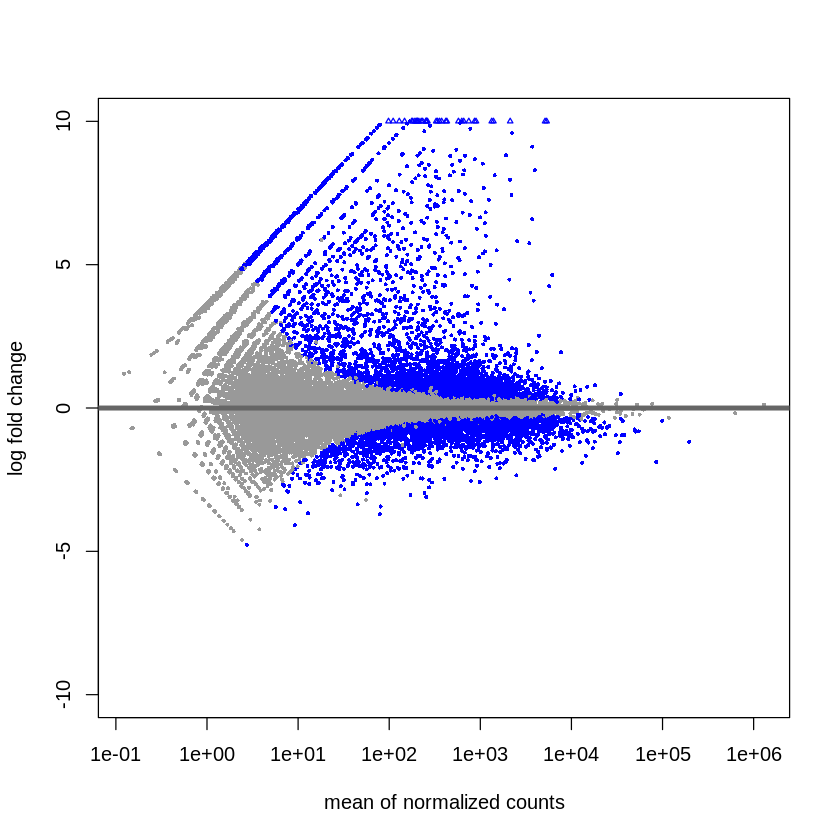

In [49]:
plotMA(res, ylim=c(-10,10))

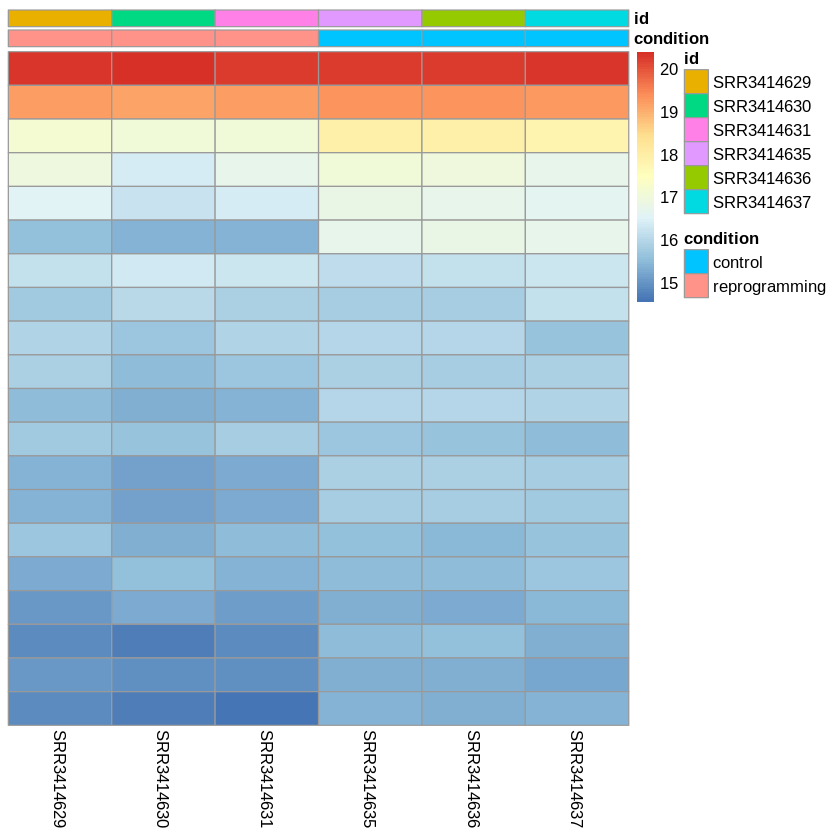

In [53]:
select <- order(rowMeans(counts(dds,normalized=TRUE)),decreasing=TRUE)[1:20]
df <- as.data.frame(colData(dds)[,c("condition","id")])
pheatmap(assay(rld)[select,], cluster_rows=FALSE, show_rownames=FALSE,cluster_cols=FALSE, annotation_col=df)

log2 fold change (MLE): condition reprogramming vs control 
Wald test p-value: condition reprogramming vs control 
DataFrame with 1 row and 6 columns
                      baseMean log2FoldChange     lfcSE      stat    pvalue
                     <numeric>      <numeric> <numeric> <numeric> <numeric>
ENSMUSG00000000903.3   4.57132        2.70557   1.09111   2.47965 0.0131512
                          padj
                     <numeric>
ENSMUSG00000000903.3 0.0342754

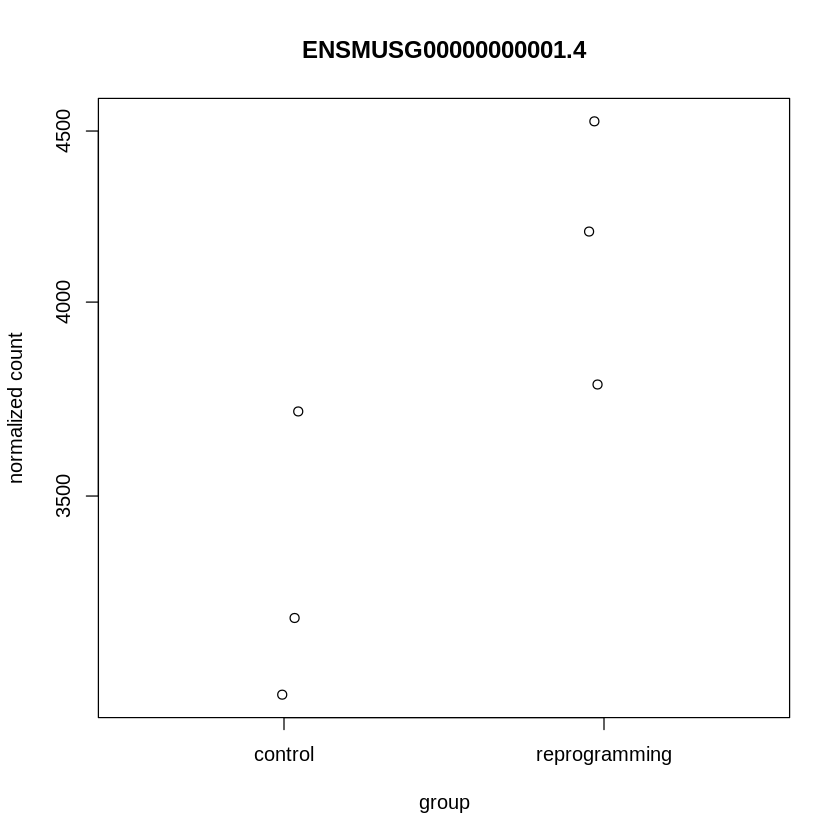

In [54]:
res[156,]
plotCounts(dds, gene=1, intgroup="condition")

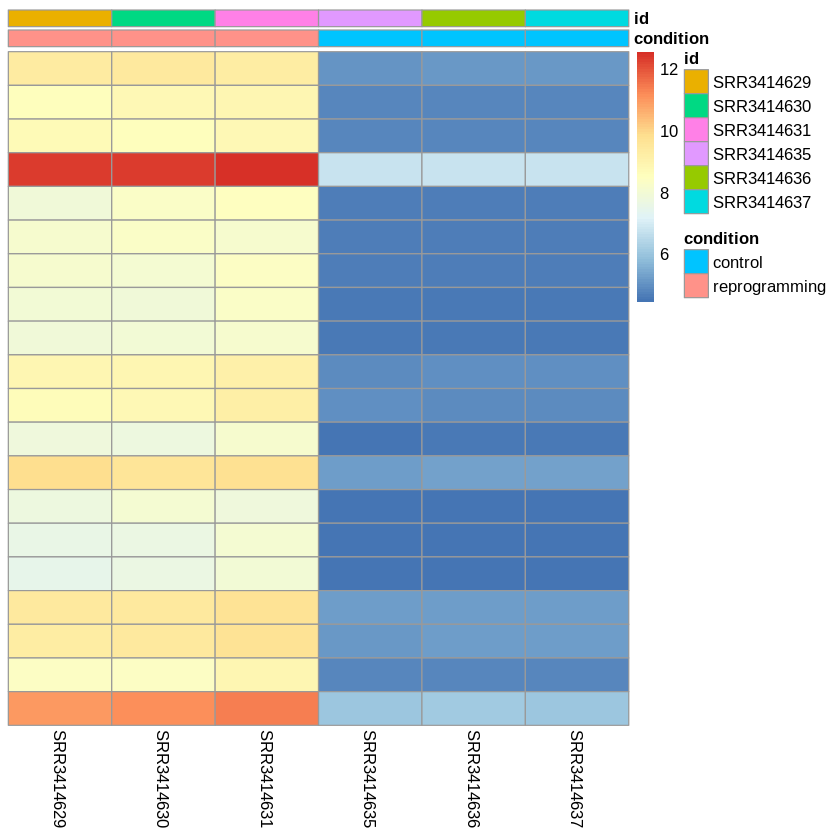

In [57]:
select <- order(res$log2FoldChange,decreasing=TRUE)[1:20]
df <- as.data.frame(colData(dds)[,c("condition","id")])
pheatmap(assay(rld)[select,], cluster_rows=FALSE, show_rownames=FALSE,cluster_cols=FALSE, annotation_col=df)

In [60]:
head(res[order(res$log2FoldChange,decreasing=TRUE),])

log2 fold change (MLE): condition reprogramming vs control 
Wald test p-value: condition reprogramming vs control 
DataFrame with 6 rows and 6 columns
                       baseMean log2FoldChange     lfcSE      stat       pvalue
                      <numeric>      <numeric> <numeric> <numeric>    <numeric>
ENSMUSG00000058354.7    575.391        12.7459  1.183611  10.76868  4.83876e-27
ENSMUSG00000040728.15   376.319        12.1340  1.187459  10.21846  1.63920e-24
ENSMUSG00000039269.5    356.820        12.0637  1.185159  10.17901  2.46045e-24
ENSMUSG00000035557.9   5136.644        11.8793  0.493616  24.06592 5.68749e-128
ENSMUSG00000046180.11   263.119        11.6176  1.194764   9.72373  2.38866e-22
ENSMUSG00000028699.9    255.323        11.5704  1.186316   9.75320  1.78737e-22
                              padj
                         <numeric>
ENSMUSG00000058354.7   1.39757e-25
ENSMUSG00000040728.15  4.22678e-23
ENSMUSG00000039269.5   6.27949e-23
ENSMUSG00000035557.9  2.31655e-125

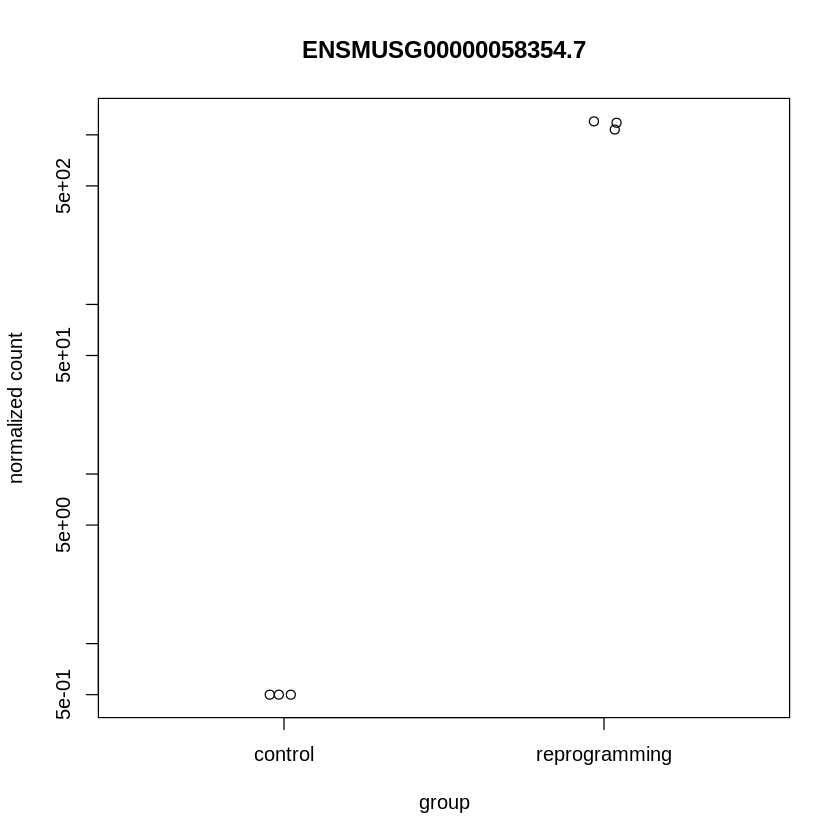

In [61]:
plotCounts(dds, gene=select[1], intgroup="condition")

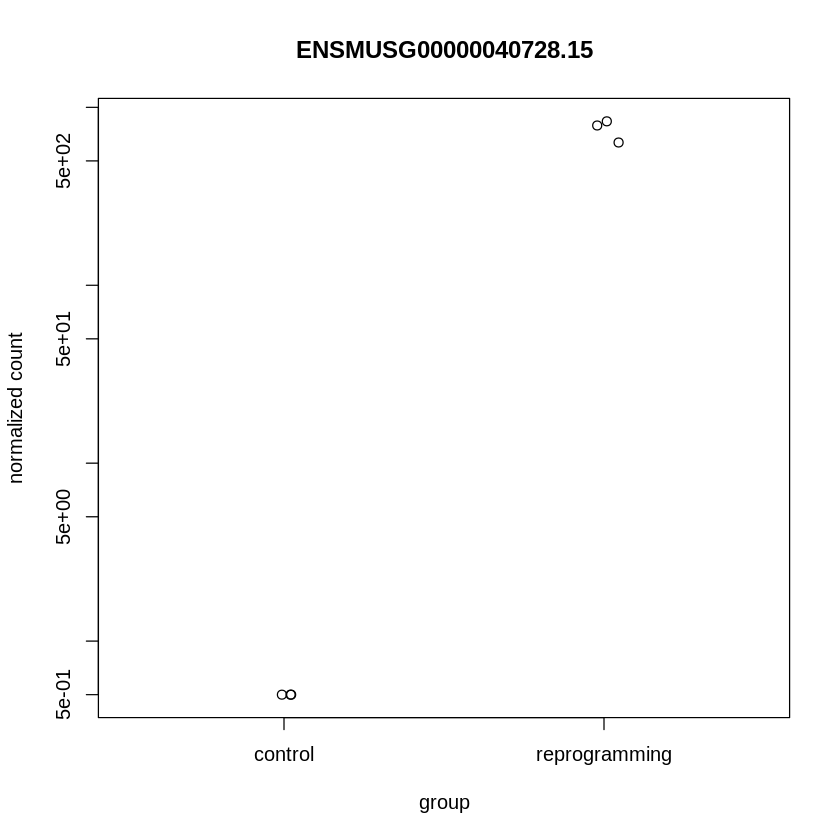

In [62]:
plotCounts(dds, gene=select[2], intgroup="condition")

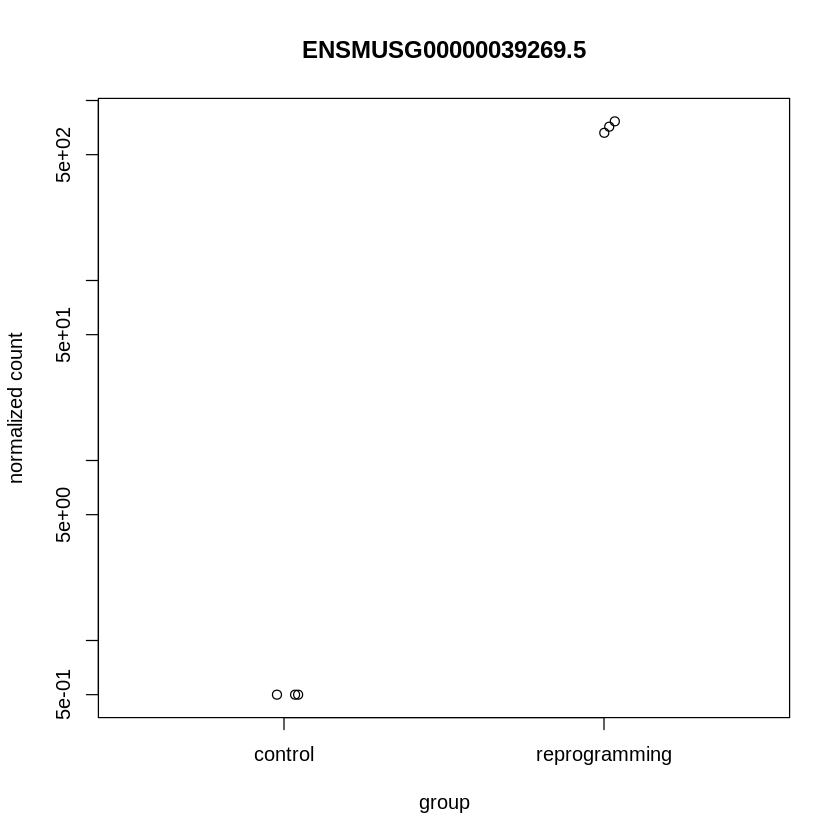

In [63]:
plotCounts(dds, gene=select[3], intgroup="condition")

In [64]:
system("mkdir hse21_hw3/data")
system("cp differentially_expressed_genes.txt hse21_hw3/data")

In [65]:
system("git add data")
system("git commit -m 'diff expressed genes uploaded'")
system("git push")